***Data Analysis:***

dataset - placement data

data points - 10000

attributes - 11




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/placementdata.csv')
df

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7.5,1,1,2,72,3.9,Yes,No,85,66,NotPlaced
9996,9997,7.4,0,1,0,90,4.8,No,No,84,67,Placed
9997,9998,8.4,1,3,0,70,4.8,Yes,Yes,79,81,Placed
9998,9999,8.9,0,3,2,87,4.8,Yes,Yes,71,85,Placed


***Questions***



1.   Does CGPA affect the placement status?
2.   Do internships improve the chances of placement?
3.   What softskill rating and aptitude test score is needed for getting placed?



In [3]:
df = df.drop(labels=['StudentID'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CGPA                       10000 non-null  float64
 1   Internships                10000 non-null  int64  
 2   Projects                   10000 non-null  int64  
 3   Workshops/Certifications   10000 non-null  int64  
 4   AptitudeTestScore          10000 non-null  int64  
 5   SoftSkillsRating           10000 non-null  float64
 6   ExtracurricularActivities  10000 non-null  object 
 7   PlacementTraining          10000 non-null  object 
 8   SSC_Marks                  10000 non-null  int64  
 9   HSC_Marks                  10000 non-null  int64  
 10  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 859.5+ KB


In [4]:
df.describe()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,69.159400,74.501500
std,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,10.430459,8.919527
min,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000
25%,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000
50%,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000
75%,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000
max,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000


***Question 1***: Does CGPA affect the placement status?

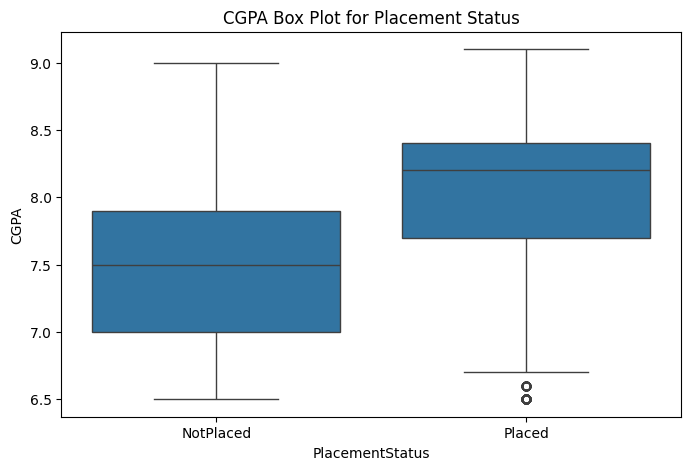

In [5]:
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.boxplot(x="PlacementStatus", y="CGPA", data=df)
plt.title("CGPA Box Plot for Placement Status")
plt.show()

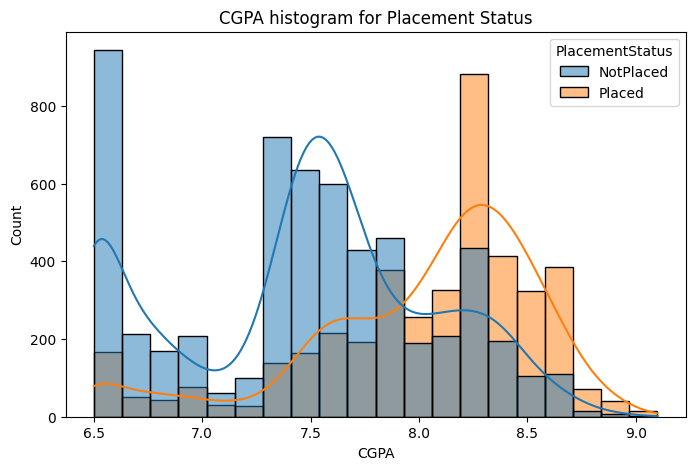

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(df, x="CGPA", hue="PlacementStatus", kde=True, bins=20)
plt.title("CGPA histogram for Placement Status")
plt.show()


The average cgpa for placed students is more than unplaced.Even some students having more cgpa not placed. But more cgpa has significant affect on placements.In KDE, the hill for placed is right to not placed, this shows average cgpa for placed is more than not placed.

***Question 2.***Do internships improve the chances of placement?

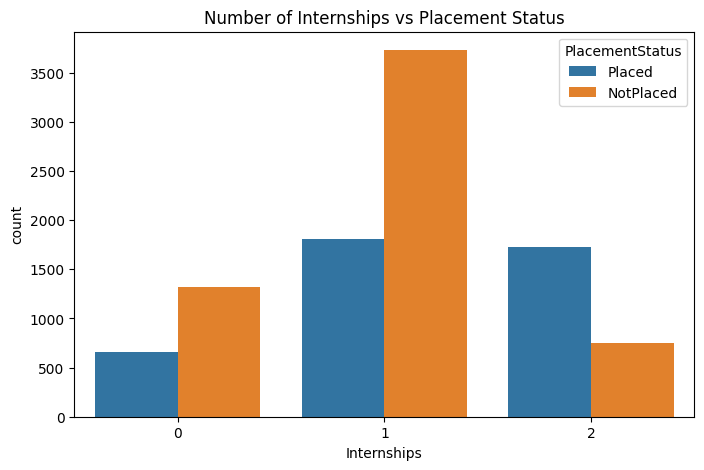

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Internships", hue="PlacementStatus", data=df)
plt.title("Number of Internships vs Placement Status")
plt.show()

From the plot, the ratio of placed and not placed is very less for 0 and 1 internships but the ratio is nearly 2 for who did two internships.So, doing two or more internships increases the chances of job.

***Question 3.***What softskill rating and Aptitude Test Score is needed for getting placed?

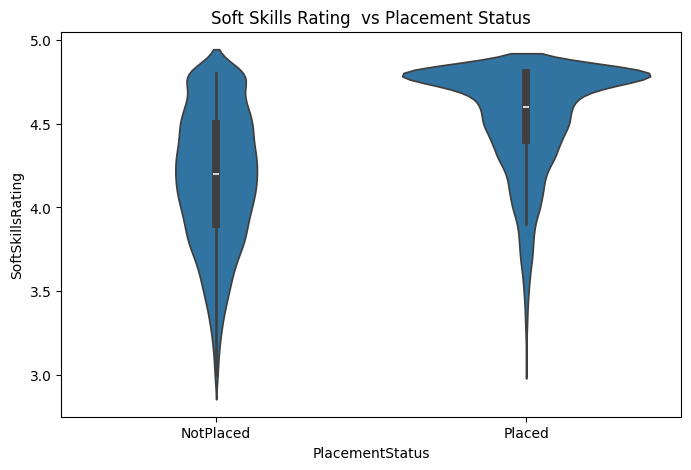

In [8]:
plt.figure(figsize=(8, 5))
sns.violinplot(x="PlacementStatus", y="SoftSkillsRating", data=df)
plt.title("Soft Skills Rating  vs Placement Status")
plt.show()

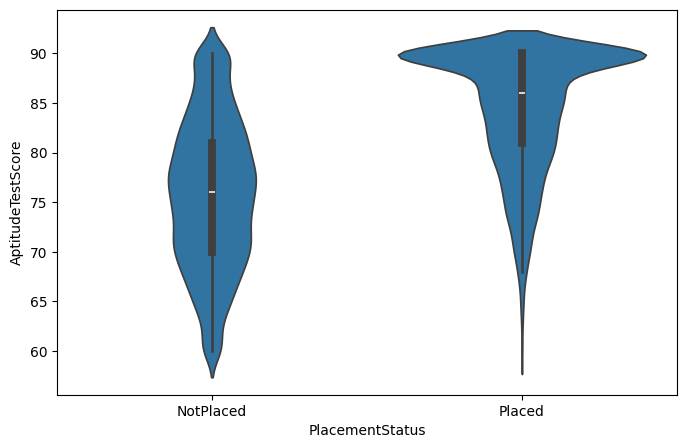

In [9]:
plt.figure(figsize=(8, 5))
sns.violinplot(x="PlacementStatus", y="AptitudeTestScore", data=df)
plt.show()

The people who got placement have softskills rating morethan 4.5 and aptitude test score more than 85. The average is also so high, so softskills rating of more than 4.5 and aptitude test score of more than 85 can gradually incrases the placement chances.

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features_for_clustering = ['CGPA', 'Internships', 'SoftSkillsRating', 'AptitudeTestScore']
X = df[features_for_clustering]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)  # Experiment with different number of clusters
df['Cluster'] = kmeans.fit_predict(X_scaled)
print(df.groupby('Cluster')[features_for_clustering].mean())

             CGPA  Internships  SoftSkillsRating  AptitudeTestScore
Cluster                                                            
0        7.972816     0.739883          4.523109          83.150991
1        8.151768     2.000000          4.600752          86.029178
2        7.214007     0.798315          4.001540          72.676534


In [15]:
from sklearn.linear_model import LogisticRegression

X = df[['CGPA', 'Internships', 'SoftSkillsRating', 'AptitudeTestScore']]
y = df['PlacementStatus']

logistic_model = LogisticRegression()
logistic_model.fit(X, y)
coefficients = logistic_model.coef_[0]
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
print(coefficients_df)

             Feature  Coefficient
0               CGPA     0.822026
1        Internships     0.186664
2   SoftSkillsRating     1.241114
3  AptitudeTestScore     0.114860


             Feature  Importance
3  AptitudeTestScore    0.393377
0               CGPA    0.325263
2   SoftSkillsRating    0.215031
1        Internships    0.066330


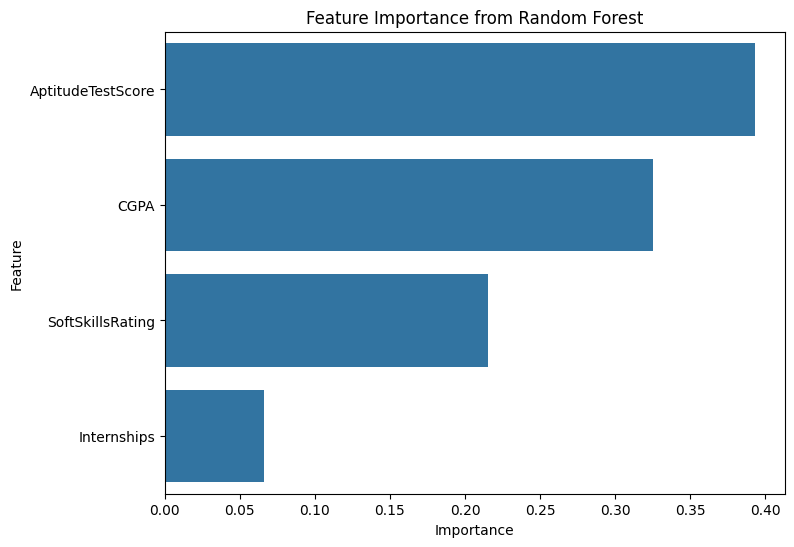

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df[['CGPA', 'Internships', 'SoftSkillsRating', 'AptitudeTestScore']]
y = df['PlacementStatus']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

feature_importances = rf_classifier.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance from Random Forest")
plt.show()